<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [7]</a>'.</span>

In [1]:
PATH_QASM_A = "qiskit_circuit_5q_10g_5557_dc52a0_027c07_error_min_qc_qiskit.qasm"
PATH_QASM_B = "qiskit_circuit_5q_10g_5557_dc52a0_027c07_error_min_qc_bqskit.qasm"

PATH_PYTHON_FILE = "qiskit_circuit_5q_10g_5557_dc52a0_027c07_error_min.py"

In [ ]:
# Parameters
PATH_QASM_A = "../reports/v009/2024_11_21__18_09/qiskit_circuit_5q_10g_5557_dc52a0_027c07_error_min_qc_qiskit.qasm"
PATH_QASM_B = "../reports/v009/2024_11_21__18_09/qiskit_circuit_5q_10g_5557_dc52a0_027c07_error_min_qc_bqskit.qasm"
PATH_PYTHON_FILE = "../reports/v009/2024_11_21__18_09/qiskit_circuit_5q_10g_5557_dc52a0_027c07_error_min.py"

In [3]:
# UNCOMMENT TO RUN WITH FILE IN THE CURRENT FOLDER
# consider all the imports relative to the current folder

# from pathlib import Path
# PATH_QASM_A = str(Path(PATH_QASM_A).name)
# PATH_QASM_B = str(Path(PATH_QASM_B).name)
# PATH_PYTHON_FILE = str(Path(PATH_PYTHON_FILE).name)

## File Content

In [2]:
from termcolor import colored


def extract_between_tags(content: str, start_tag: str, end_tag: str) -> str:
    start_index = content.find(start_tag) + len(start_tag)
    end_index = content.find(end_tag)
    return content[start_index:end_index]


def print_and_return_content(
        file_name, color: str, start_tag: str = None, end_tag: str = None) -> str:
    print(colored("Filename: ", color), file_name)
    with open(file_name, "r") as f:
        content = f.read()
        if start_tag and end_tag:
            content = extract_between_tags(content, start_tag, end_tag)
        print(colored(content, color))
    print("\n")
    return content


qasm_a_str = print_and_return_content(PATH_QASM_A, color="green")
if PATH_QASM_B:
    qasm_b_str = print_and_return_content(PATH_QASM_B, color="blue")

py_file_str = print_and_return_content(
    PATH_PYTHON_FILE, color="magenta", start_tag="# <START_GATES>",
    end_tag="import os")

Filename:  qiskit_circuit_5q_10g_5557_dc52a0_027c07_error_min_qc_qiskit.qasm
OPENQASM 2.0;
include "qelib1.inc";
qreg reg_1_q[5];
qreg reg_2_q[4];
creg reg_2_c[4];
measure reg_2_q[0] -> reg_2_c[0];
h reg_2_q[0];



Filename:  qiskit_circuit_5q_10g_5557_dc52a0_027c07_error_min_qc_bqskit.qasm
OPENQASM 2.0;
include "qelib1.inc";
qreg q[9];
creg reg_2_c[4];
measure q[0] -> reg_2_c[0];
h q[5];



Filename:  qiskit_circuit_5q_10g_5557_dc52a0_027c07_error_min.py


qc = qasm2.loads(
"""
include "qelib1.inc";
qreg reg_1_q[5];
qreg reg_2_q[4];
creg reg_2_c[4];
measure reg_2_q[0] -> reg_2_c[0];
h reg_2_q[0];
"""
    , custom_instructions=qasm2.LEGACY_CUSTOM_INSTRUCTIONS)






## Circuit Diagram

In [3]:
from qiskit.qasm2 import load
from qiskit import qasm2

circuit_a = load(
    PATH_QASM_A, custom_instructions=qasm2.LEGACY_CUSTOM_INSTRUCTIONS)
print(circuit_a)
if PATH_QASM_B:
    circuit_b = load(
        PATH_QASM_B, custom_instructions=qasm2.LEGACY_CUSTOM_INSTRUCTIONS)
    print(circuit_b)

                   
reg_1_q_0: ────────
                   
reg_1_q_1: ────────
                   
reg_1_q_2: ────────
                   
reg_1_q_3: ────────
                   
reg_1_q_4: ────────
           ┌─┐┌───┐
reg_2_q_0: ┤M├┤ H ├
           └╥┘└───┘
reg_2_q_1: ─╫──────
            ║      
reg_2_q_2: ─╫──────
            ║      
reg_2_q_3: ─╫──────
            ║      
reg_2_c: 4/═╩══════
            0      
           ┌─┐     
      q_0: ┤M├─────
           └╥┘     
      q_1: ─╫──────
            ║      
      q_2: ─╫──────
            ║      
      q_3: ─╫──────
            ║      
      q_4: ─╫──────
            ║ ┌───┐
      q_5: ─╫─┤ H ├
            ║ └───┘
      q_6: ─╫──────
            ║      
      q_7: ─╫──────
            ║      
      q_8: ─╫──────
            ║      
reg_2_c: 4/═╩══════
            0      


## Step by Step Import BQSKit

In [ ]:
from bqskit.ext import qiskit_to_bqskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import Session, Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Section: Circuit
from qiskit import qasm2
# <START_GATES>

qc = qasm2.loads(
    """
include "qelib1.inc";
qreg reg_1_q[5];
qreg reg_2_q[4];
creg reg_2_c[4];
measure reg_2_q[0] -> reg_2_c[0];
h reg_2_q[0];
""", custom_instructions=qasm2.LEGACY_CUSTOM_INSTRUCTIONS)
print(qc)

bqskit_circ = qiskit_to_bqskit(qc)
print(bqskit_circ)

                   
reg_1_q_0: ────────
                   
reg_1_q_1: ────────
                   
reg_1_q_2: ────────
                   
reg_1_q_3: ────────
                   
reg_1_q_4: ────────
           ┌─┐┌───┐
reg_2_q_0: ┤M├┤ H ├
           └╥┘└───┘
reg_2_q_1: ─╫──────
            ║      
reg_2_q_2: ─╫──────
            ║      
reg_2_q_3: ─╫──────
            ║      
reg_2_c: 4/═╩══════
            0      
Circuit(9)[measurement@(5,), HGate@(5,)]


In [ ]:
# bqskit_circuit = Circuit.from_file(PATH_QASM_A)
# print(bqskit_circuit)

Circuit(9)[measurement@(5,), HGate@(5,)]


                   
  reg_1_q: ────────
           ┌─┐┌───┐
reg_2_q_0: ┤M├┤ H ├
           └╥┘└───┘
reg_2_q_1: ─╫──────
            ║      
reg_2_c: 2/═╩══════
            0      
Circuit(3)[measurement@(1,), HGate@(1,)]
OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
creg reg_2_c[2];
measure q[0] -> reg_2_c[0];
h q[1];

           ┌─┐     
      q_0: ┤M├─────
           └╥┘┌───┐
      q_1: ─╫─┤ H ├
            ║ └───┘
      q_2: ─╫──────
            ║      
reg_2_c: 2/═╩══════
            0      


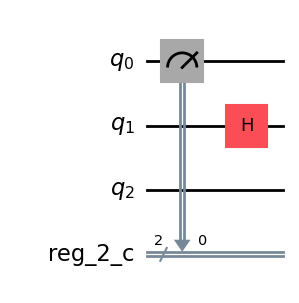

In [26]:
from qiskit import qasm2
from bqskit import Circuit
import tempfile
from qiskit.visualization import circuit_drawer

qasm_content = """
OPENQASM 2.0;
include "qelib1.inc";
qreg reg_1_q[1];
qreg reg_2_q[2];
creg reg_2_c[2];
measure reg_2_q[0] -> reg_2_c[0];
h reg_2_q[0];
"""
qc_before = qasm2.loads(
    qasm_content, custom_instructions=qasm2.LEGACY_CUSTOM_INSTRUCTIONS)
print(qc_before)

with tempfile.NamedTemporaryFile(delete=False, suffix=".qasm") as temp_file:
    temp_file.write(qasm_content.encode())
    temp_file.flush()  # Ensure the content is written to the file
    file_path = temp_file.name
    bqskit_circuit = Circuit.from_file(file_path)
    print(bqskit_circuit)

# export

bqskit_circuit.save("test_exported_qc_bqskit.qasm")
# print content of file
with open("test_exported_qc_bqskit.qasm", "r") as f:
    print(f.read())

qc_after = qasm2.load(
    "test_exported_qc_bqskit.qasm",
    custom_instructions=qasm2.LEGACY_CUSTOM_INSTRUCTIONS)
print(qc_after)
# Draw the circuit and save as PDF
circuit_drawer(qc_after, output='mpl', filename='qc_after.pdf')

## Compare Semantics

### QCEC Oracle

In [6]:
from mqt import qcec
if PATH_QASM_B:
    res = qcec.verify(
        PATH_QASM_A, PATH_QASM_B,
        transform_dynamic_circuit=True)
    print(colored(f"QCEC result: {res.equivalence}", "magenta"))
    print(res)

QCEC result: not_equivalent
{
  "check_time": 0.007994232,
  "checkers": [
    {
      "checker": "decision_diagram_alternating",
      "equivalence": "not_equivalent",
      "max_nodes": 5,
      "runtime": 1.3378e-05
    },
    {
      "checker": "zx",
      "equivalence": "probably_not_equivalent",
      "runtime": 1.8031e-05
    },
    {
      "checker": "decision_diagram_simulation",
      "equivalence": "no_information",
      "max_nodes": 0,
      "runtime": 0.0
    },
    {
      "checker": "decision_diagram_simulation",
      "equivalence": "no_information",
      "max_nodes": 0,
      "runtime": 0.0
    },
    {
      "checker": "decision_diagram_simulation",
      "equivalence": "no_information",
      "max_nodes": 0,
      "runtime": 0.0
    },
    {
      "checker": "decision_diagram_simulation",
      "equivalence": "no_information",
      "max_nodes": 0,
      "runtime": 0.0
    }
  ],
  "circuit1": {
    "name": "qiskit_circuit_5q_10g_5557_dc52a0_027c07_error_min_qc_qis

[QCEC] Warning: at least one of the circuits has garbage qubits, but partial equivalence checking is turned off. In order to take into account the garbage qubits, enable partial equivalence checking. Consult the documentation for moreinformation.


### Simulation (Qiskit)

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [7]:
from qiskit.quantum_info import Statevector

sv_a = Statevector.from_instruction(circuit_a)
print(colored(PATH_QASM_A, "green"))
print(colored("Statevector A: ", "green"), sv_a)

if PATH_QASM_B:
    sv_b = Statevector.from_instruction(circuit_b)
    print(colored(PATH_QASM_B, "blue"))
    print(colored("Statevector B: ", "blue"), sv_b)

# compare the statevectors
probabilities_a = sv_a.probabilities_dict()
print(colored(PATH_QASM_A, "green"))
print(colored("Probabilities A: ", "green"), probabilities_a)
if PATH_QASM_B:
    probabilities_b = sv_b.probabilities_dict()
    print(colored(PATH_QASM_B, "blue"))
    print(colored("Probabilities B: ", "blue"), probabilities_b)

QiskitError: 'Cannot apply instruction with classical bits: measure'